In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-09-06 18:03:04--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-09-06 18:03:04 (44.8 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header=None).values

In [ ]:
data[:,0].shape

(162,)

In [ ]:
#X must be of the form N*D so reshape X to be -1(auto)*D(dimension 1)

In [ ]:
X = data[:,0].reshape(-1,1)
y = data[:,1]

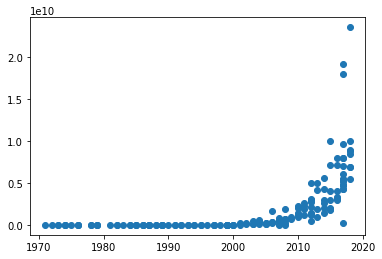

In [ ]:
plt.scatter(X,y)

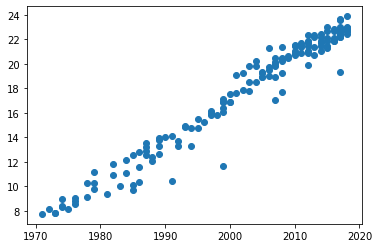

In [ ]:
plt.scatter(X,np.log(y))

In [ ]:
y = np.log(y)

In [ ]:
#Scaling X
X = X - np.mean(X)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)



In [ ]:
r = model.fit(X,y, callbacks=[scheduler], epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 485.6033
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 368.5816
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 286.7525
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 380.5970
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 317.7031
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 167.1340
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 99.0231
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 91.0863
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 59.0773
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 47.9324
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 33.2158
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 21.7782
Epoch 13/200
6/6 [=========================

In [ ]:
type(r.history)

dict

In [ ]:
r.history.keys()

dict_keys(['loss', 'lr'])

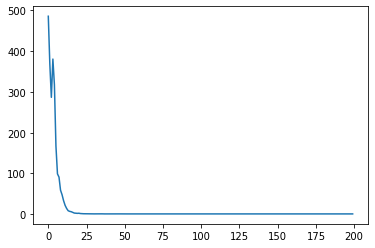

In [ ]:
plt.plot(r.history['loss'])

In [ ]:
len(model.layers)

1

In [ ]:
model.layers[0]

In [ ]:
model.layers[0].get_weights()

[array([[0.3437399]], dtype=float32), array([17.767694], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0]

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.3529688 $$

so that:

$$ r = e^{0.3529688} $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: [2.0164874]


#**Making predictions**

In [ ]:
yhat = model.predict(X).flatten()

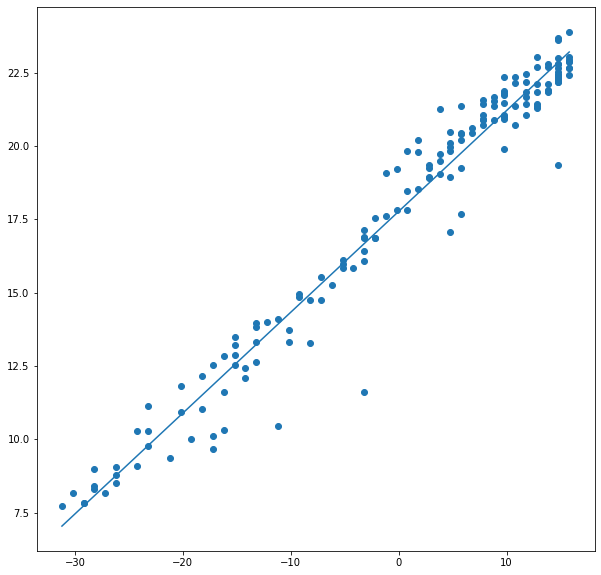

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X,yhat)

In [ ]:
w, b = model.layers[0].get_weights()
X = X.reshape(-1, 1)
yhat2 = (X.dot(w) + b).flatten()
np.allclose(yhat, yhat2)

True